In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [23]:
df= pd.read_csv('D:\STUDY MATERIAL\SEM-4\internship\stock.csv')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [25]:
df.shape

(2035, 8)

In [26]:
#check basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [27]:
#get statistic summaries of dataset
df.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [30]:
df_close = df.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [31]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

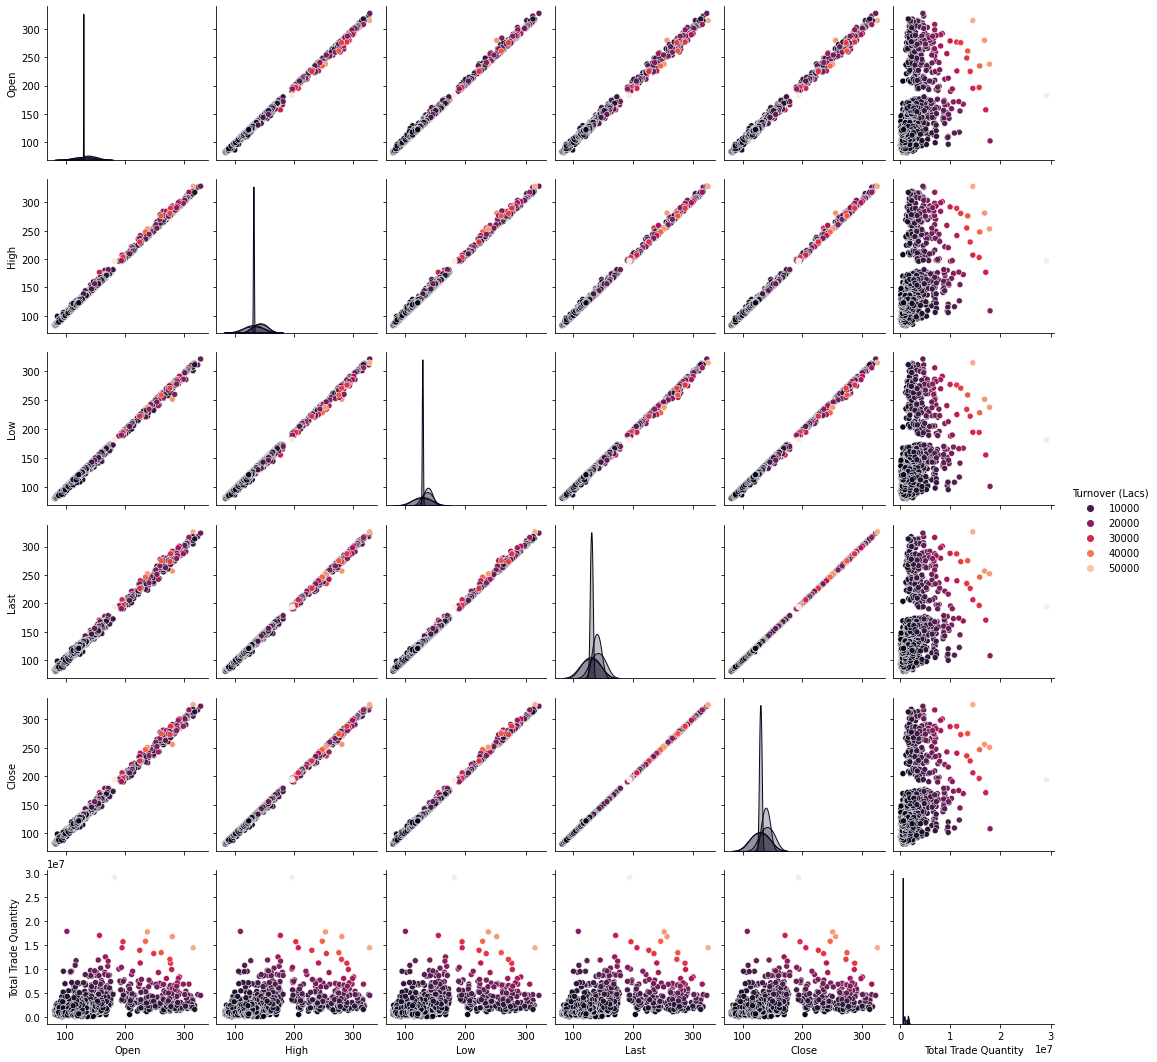

In [35]:
sns.pairplot(df, hue ='Turnover (Lacs)', palette = "rocket")
plt.show()

In [37]:
df_close = df.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

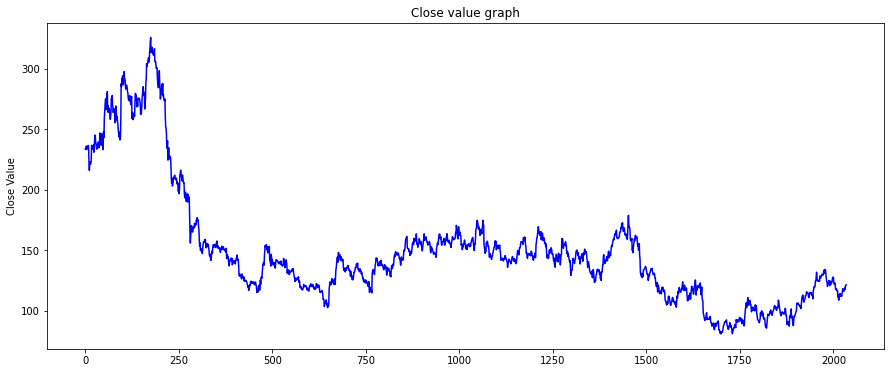

In [38]:
plt.figure(figsize=(15,6))
plt.plot(df_close, c = "b")
plt.ylabel("Close Value")
plt.title('Close value graph')
plt.show()

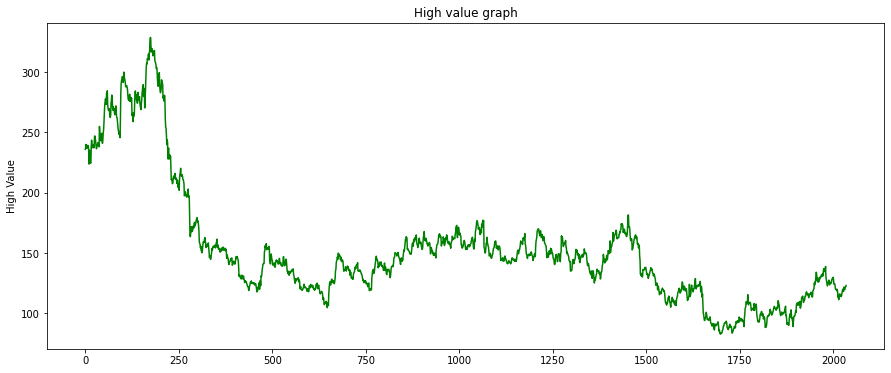

In [39]:
plt.figure(figsize=(15,6))
df_high=df.reset_index()['High']
plt.plot(df_high, c = "g")
plt.ylabel("High Value")
plt.title('High value graph')
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [41]:
df_high.shape

(2035, 1)

In [44]:
training_size = int(len(df_high)*0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high),:1]

In [45]:
print('Training_data ;', train_data.size)
print('Training_data ;', test_data.size)

Training_data ; 1526
Training_data ; 509


In [50]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [] , []
    for i in range(len(dataset)- time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
       
    return np.array(dataX), np.array(dataY)
    

In [51]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [53]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [54]:
print("X Training Data :", x_train.shape)
print("X Testing Data :", x_test.shape)
print("Y Training Data :", y_train.shape)
print("Y Testing Data :", y_test.shape)

X Training Data : (1425, 100, 1)
X Testing Data : (408, 100, 1)
Y Training Data : (1425,)
Y Testing Data : (408,)


In [59]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [60]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
23/23 [==============================] - 14s 239ms/step - loss: 0.0254 - val_loss: 0.0069
Epoch 2/100
23/23 [==============================] - 4s 186ms/step - loss: 0.0027 - val_loss: 8.4213e-04
Epoch 3/100
23/23 [==============================] - 4s 185ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 5s 212ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 5s 234ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 5s 232ms/step - loss: 0.0012 - val_loss: 8.4515e-04
Epoch 7/100
23/23 [==============================] - 5s 196ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 4s 186ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 4s 185ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0011

23/23 [==============================] - 4s 184ms/step - loss: 2.8552e-04 - val_loss: 2.4686e-04
Epoch 77/100
23/23 [==============================] - 4s 184ms/step - loss: 2.9045e-04 - val_loss: 2.7180e-04
Epoch 78/100
23/23 [==============================] - 4s 195ms/step - loss: 2.6044e-04 - val_loss: 3.0028e-04
Epoch 79/100
23/23 [==============================] - 4s 184ms/step - loss: 2.6290e-04 - val_loss: 3.0843e-04
Epoch 80/100
23/23 [==============================] - 4s 190ms/step - loss: 2.5464e-04 - val_loss: 3.0826e-04
Epoch 81/100
23/23 [==============================] - 4s 187ms/step - loss: 2.5109e-04 - val_loss: 3.2090e-04
Epoch 82/100
23/23 [==============================] - 4s 184ms/step - loss: 2.3455e-04 - val_loss: 2.4202e-04
Epoch 83/100
23/23 [==============================] - 4s 191ms/step - loss: 2.5712e-04 - val_loss: 2.7265e-04
Epoch 84/100
23/23 [==============================] - 4s 186ms/step - loss: 2.6718e-04 - val_loss: 2.3093e-04
Epoch 85/100
23/23 [===

In [68]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [69]:
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [71]:
math.sqrt(mean_squared_error(y_train, train_predict))

167.20576444616

math.sqrt(mean_squared_error(y_test, test_predict))

In [72]:
math.sqrt(mean_squared_error(y_test, test_predict))

109.40659809629358

In [77]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_high)-1,:]=test_predict

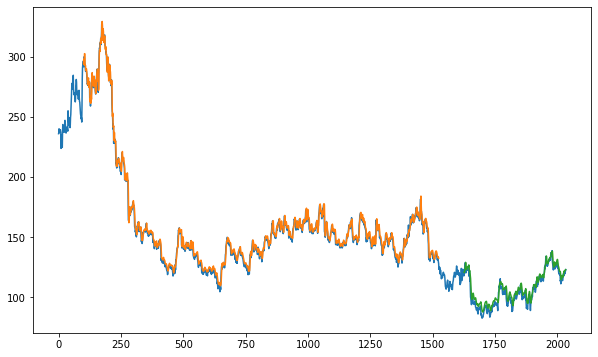

Green indicates Predicted Data
Blue indicates Complete Data
Orange indicates Train Data


In [78]:
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates Predicted Data")
print("Blue indicates Complete Data")
print("Orange indicates Train Data")

In [79]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [80]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [88]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays=28
i=0

while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1: ]
        lst_output.extend(yhat.tolist())
        i = i+1
        
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
        print(lst_output) 
        
 
        

0 day input [0.13397032 0.13356373 0.13498679 0.14108559 0.13498679 0.12644847
 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049 0.15368977
 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904 0.20817239
 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228 0.17849156
 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599 0.19028258
 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665 0.19597479
 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754 0.21610083
 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372 0.1622281
 0.17056312 0.17462899 0.17930474 0.18174426 0.16853019 0.16548079
 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839 0.18459036
 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654 0.16751372
 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037 0.14860744
 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811 0.11547062
 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385 0.12807481
 0.12624517 0.13051433 0.13905265 0.14718439 0.1510

8 day output [[0.20770381]]
9 day input [0.1467778  0.15003049 0.15368977 0.17198618 0.16548079 0.17625534
 0.17564546 0.19129904 0.20817239 0.20309006 0.18479366 0.17930474
 0.1896727  0.17483228 0.17849156 0.17645863 0.18540354 0.18377719
 0.19190892 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138
 0.19495832 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874
 0.21528766 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706
 0.17340923 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474
 0.18174426 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264
 0.17157959 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575
 0.18581012 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612
 0.15003049 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499
 0.12441553 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679
 0.12868469 0.13295385 0.12807481 0.12624517 0.13051433 0.13905265
 0.14718439 0.15104696 0.14515145 0.14311852 0.15816223 0.15328319
 0.14921732 0.15531612 

17 day output [[0.23701067]]
18 day input [0.20309006 0.18479366 0.17930474 0.1896727  0.17483228 0.17849156
 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599 0.19028258
 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665 0.19597479
 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754 0.21610083
 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372 0.1622281
 0.17056312 0.17462899 0.17930474 0.18174426 0.16853019 0.16548079
 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839 0.18459036
 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654 0.16751372
 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037 0.14860744
 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811 0.11547062
 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385 0.12807481
 0.12624517 0.13051433 0.13905265 0.14718439 0.15104696 0.14515145
 0.14311852 0.15816223 0.15328319 0.14921732 0.15531612 0.15917869
 0.15938199 0.16344786 0.16865674 0.17250492 0.17676635 0.1810692
 0.18526669 0.18932   

26 day output [[0.26404315]]
27 day input [0.19190892 0.18987599 0.19028258 0.19394186 0.20004066 0.19638138
 0.19495832 0.20349665 0.19597479 0.21162838 0.22036999 0.20979874
 0.21528766 0.21589754 0.21610083 0.22748526 0.19150234 0.1833706
 0.17340923 0.16751372 0.1622281  0.17056312 0.17462899 0.17930474
 0.18174426 0.16853019 0.16548079 0.1742224  0.1713763  0.17300264
 0.17157959 0.17767839 0.18459036 0.18702988 0.18987599 0.19109575
 0.18581012 0.17015654 0.16751372 0.16974995 0.16609067 0.15531612
 0.15003049 0.15064037 0.14860744 0.14596463 0.15043708 0.14413499
 0.12441553 0.12827811 0.11547062 0.12034966 0.13478349 0.13498679
 0.12868469 0.13295385 0.12807481 0.12624517 0.13051433 0.13905265
 0.14718439 0.15104696 0.14515145 0.14311852 0.15816223 0.15328319
 0.14921732 0.15531612 0.15917869 0.15938199 0.16344786 0.16865674
 0.17250492 0.17676635 0.1810692  0.18526669 0.18932    0.19322827
 0.19700323 0.2006619  0.20422284 0.20770381 0.2111202  0.2144838
 0.21780333 0.22108467

In [90]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 129)

In [91]:
day_new.shape

(100,)

In [92]:
day_pred.shape

(28,)

In [94]:
ds3 = df_high.tolist()
ds3.extend(lst_output)

len(df_high)

2035

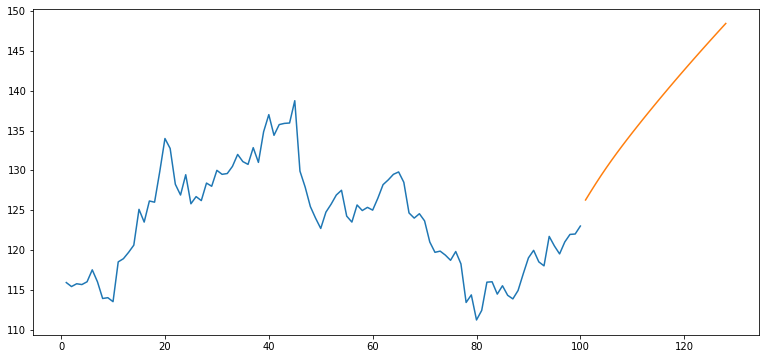

In [96]:
#Graph of 100 days
plt.figure(figsize=(13,6))

plt.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

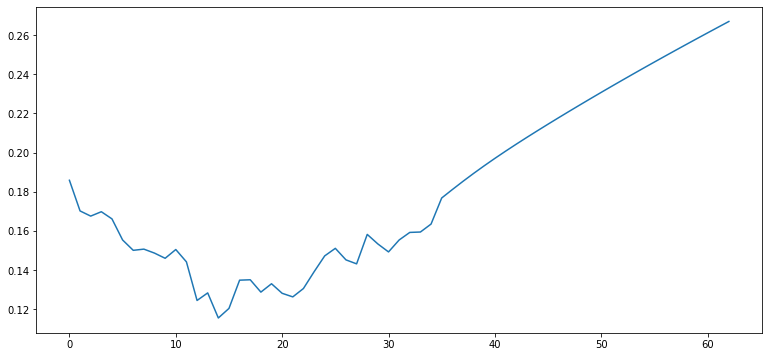

In [97]:
plt.figure(figsize=(13,6))

ds3= df_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000:])
plt.show()

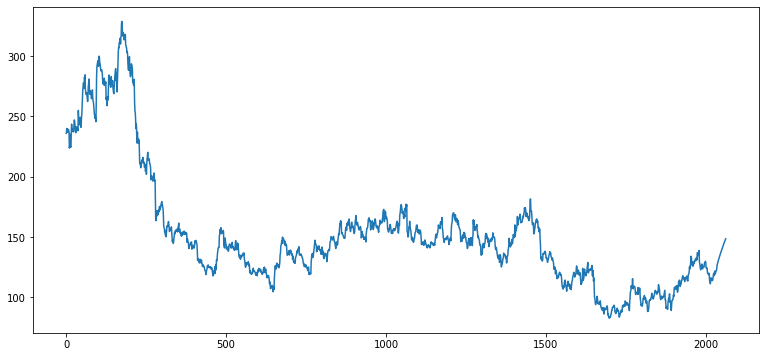

In [98]:
plt.figure(figsize=(13,6))

ds3= scaler.inverse_transform(ds3).tolist()

plt.plot(ds3)
plt.show()

In [ ]:
#Model created successfully!